# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [30]:
library(tidyverse)
library(gvlma)

In [31]:
install.packages('gvlma', repos='http://cran.us.r-project.org')

Warning message:
"package 'gvlma' is in use and will not be installed"




# Assignment 1


## Data

The data are given:


In [32]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

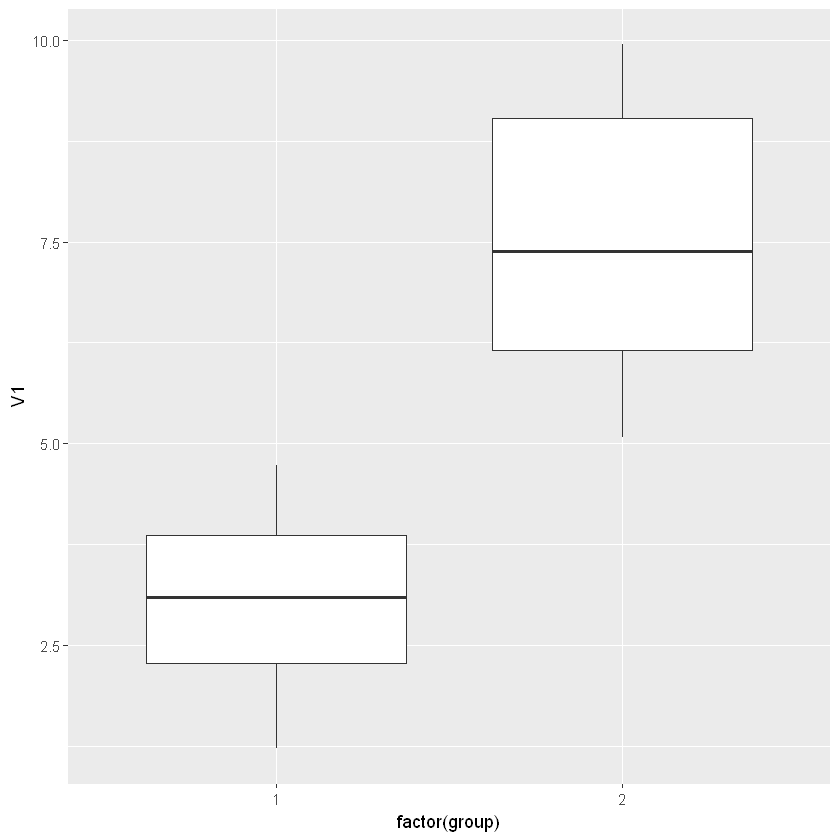

In [33]:
ggplot(df1, aes(x=factor(group), y=V1)) +
  geom_boxplot()


## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [34]:
reg1 <- lm(data=df1, response~V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [35]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



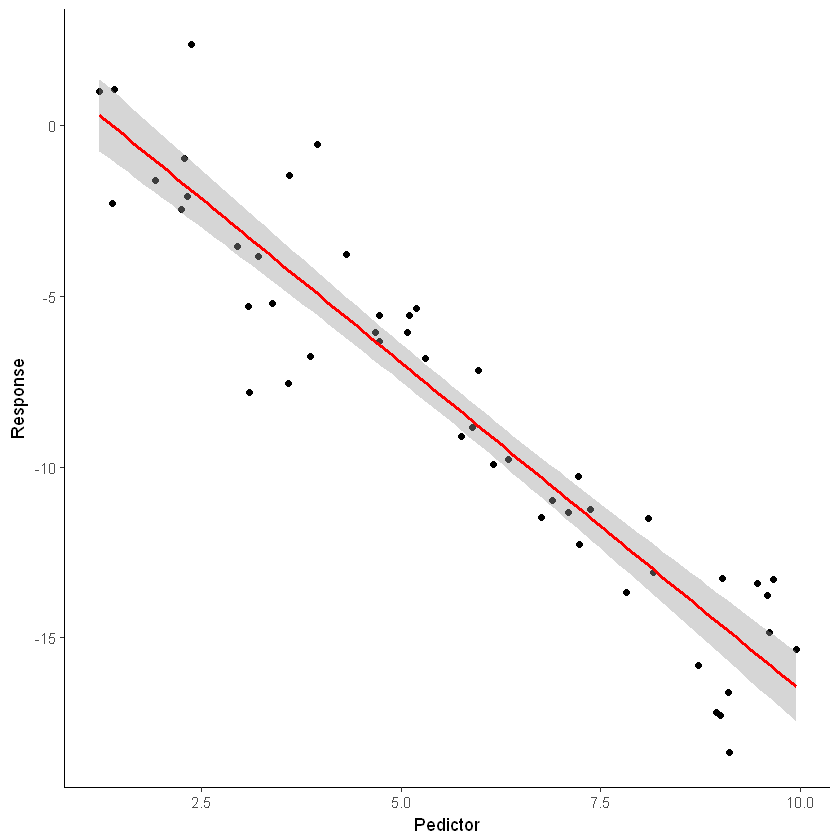

In [36]:
ggplot(df1, aes(x = V1, y = response)) + geom_point() + theme_classic() + geom_smooth(method = "lm", colour = 'red') + ylab('Response') + xlab('Pedictor')

# Assigment 2

# Packages

In [37]:
library(thematicmaps)
library(tidyverse)

ERROR: Error in library(thematicmaps): there is no package called 'thematicmaps'



## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [38]:
map_municipal <- read.csv2("../Downloads/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.5,594393.8,1,FALSE,1,0.1
Appingedam,0,251427.8,594486.7,2,FALSE,1,0.1
Appingedam,0,251668.8,594646.8,3,FALSE,1,0.1
Appingedam,0,251713.5,594770.9,4,FALSE,1,0.1
Appingedam,0,251354.6,595461.4,5,FALSE,1,0.1
Appingedam,0,251310.3,596022.5,6,FALSE,1,0.1


## Assignment 2b

Now you can make an empty map of the Netherlands.

In [39]:
AddMapLayer(MapPlot(), map_municipal)


ERROR: Error in AddMapLayer(MapPlot(), map_municipal): could not find function "AddMapLayer"


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [40]:
pc4_locations <- read.csv2("../Downloads/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : num  122244 121613 120325 119515 120740 ...
 $ Y  : num  487223 487555 489672 489422 488009 ...


## Assignment 2d

### 2di

Read in the school data


In [41]:
schools <- read.csv2("../Downloads/schools.csv")

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [42]:
schools1 <- schools %>%
    mutate(PC4 = substr(POSTCODE,1 ,4))%>%
    select(PC4, DENOMINATIE) %>%
    mutate(PC4 = as.integer(PC4))
 
head(schools1)
str(schools1)

PC4,DENOMINATIE
NA,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar


'data.frame':	1603 obs. of  2 variables:
 $ PC4        : int  NA 9406 9401 9402 9331 9411 9461 9402 9402 9403 ...
 $ DENOMINATIE: Factor w/ 25 levels "                              ",..: 10 10 10 10 10 10 10 10 10 10 ...


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [43]:
school_loc <- inner_join(pc4_locations, schools1, by = 'PC4') %>%
    filter(DENOMINATIE == 'Rooms-Katholiek' | DENOMINATIE == 'Protestants-Christelijk')
head(school_loc)

PC4,X,Y,DENOMINATIE
1065,116701.2,485645.8,Protestants-Christelijk
1071,120223.0,485571.3,Rooms-Katholiek
1077,120152.7,484262.8,Rooms-Katholiek
1077,120152.7,484262.8,Protestants-Christelijk
1081,118277.6,482449.5,Protestants-Christelijk
1132,132947.2,501873.0,Rooms-Katholiek


## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [44]:
 ddMapLayer(MapPlot(), map_municipal) %>%
    AddPointsLayer(school_loc)


ERROR: Error in ddMapLayer(MapPlot(), map_municipal): could not find function "ddMapLayer"


End of notebook